# Demo
This notebook contains a demo for loading a video and examining the number of `corner_peaks` in a given frame

In [1]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
from skimage.color import rgb2grey
import moviepy.editor as mpy
from skimage.feature import corner_harris, corner_subpix, corner_peaks
import naive_solution as motd

import ipywidgets
from IPython.display import display

%matplotlib inline

In [2]:
# load a video
motd_clip = motd.load_video('motd-sample.mp4')

The following slider allows you to choose a frame to inspect.

The values shown are the time of the selected frame in seconds. Once the frame has been chosen, re-run the cell below to show frame with `corner_peaks` highlighted.

In [3]:
# set up interactive slider for time of sample frame (seconds)
sample_time = 9*60 + 10  # 9 mins 10 secs

w = ipywidgets.IntSlider()
w.max = motd_clip.duration
w.value = sample_time
display(w)

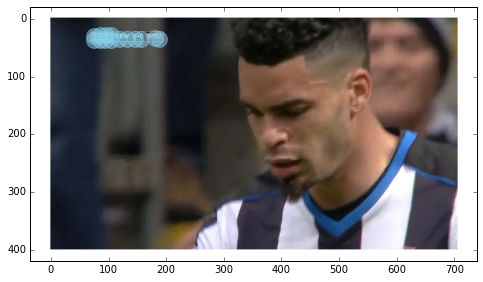

In [4]:
# Get a frame with a match
sample_frame = motd_clip.get_frame(w.value)
bw_frame = rgb2grey(sample_frame)  # make bw for edge detection

# Find edges with skimage
coords = corner_peaks(corner_harris(bw_frame), min_distance=5)

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(sample_frame)
ax.scatter(coords[:, 1], coords[:, 0], alpha=0.5, color='skyblue', s=250)